#**Basic Churn Scoring**

**Import Libraries**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

**Import Data**

In [2]:
df = pd.read_csv("Customertravel.csv")

###**Explore Data**

In [3]:
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [4]:
df.iloc[2]

Age                                      37
FrequentFlyer                            No
AnnualIncomeClass             Middle Income
ServicesOpted                             3
AccountSyncedToSocialMedia              Yes
BookedHotelOrNot                         No
Target                                    0
Name: 2, dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


In [6]:
df.isna().sum()

Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Target                        0
dtype: int64

In [7]:
df.describe()

,Age,ServicesOpted,Target
count,954.000000,954.000000,954.000000
mean,32.109015,2.437107,0.234801
std,3.337388,1.606233,0.424097
min,27.000000,1.000000,0.000000
25%,30.000000,1.000000,0.000000
50%,31.000000,2.000000,0.000000
75%,35.000000,4.000000,0.000000
max,38.000000,6.000000,1.000000


**Explore avg Age by Target**


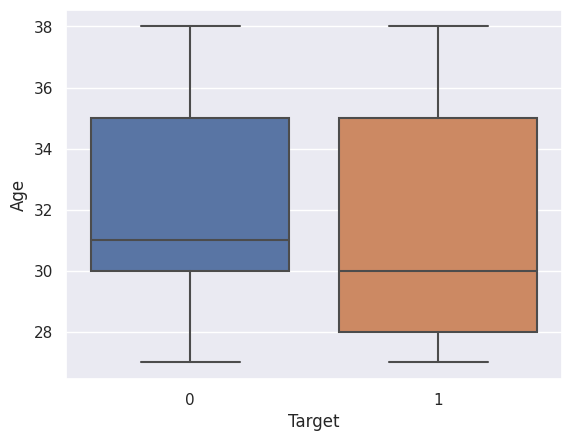

In [8]:
sns.boxplot(data=df, x='Target', y='Age')
plt.show()

**Explore avg Age by Target**


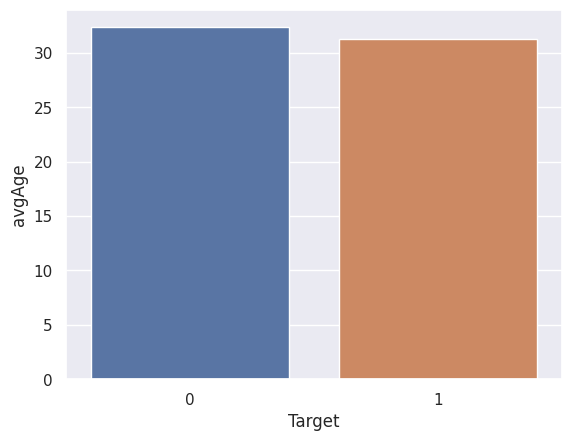

In [9]:
df_by_target = df.groupby(by=['Target']).agg(
          avgAge=('Age','mean'),
          avgServicesOpted=('ServicesOpted','mean')).reset_index()

sns.barplot(data=df_by_target, x='Target', y='avgAge')
plt.show()

**Explore ServicesOpted by Target**


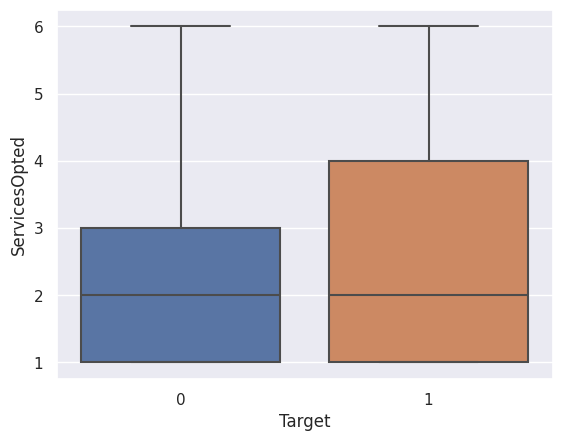

In [10]:
sns.boxplot(data=df, x='Target', y='ServicesOpted')
plt.show()

**Explore avg ServicesOpted by Target**

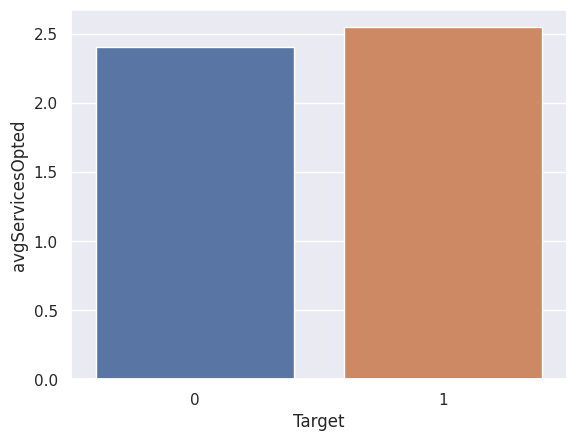

In [11]:
df_by_target = df.groupby(by=['Target']).agg(
          avgServicesOpted=('ServicesOpted','mean')).reset_index()

sns.barplot(data=df_by_target, x='Target', y='avgServicesOpted')
plt.show()

**Explore No. of customers by Target**

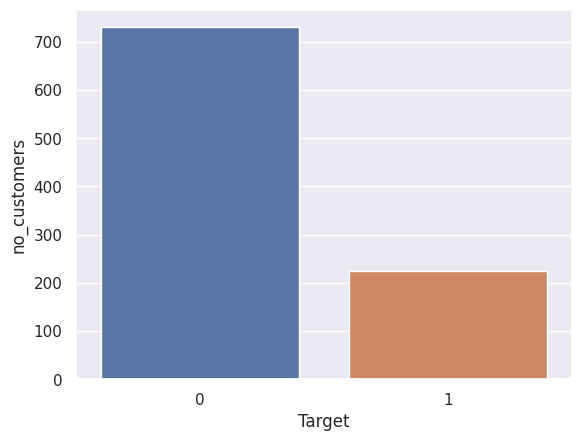

In [12]:
df_noCust_by_target = df.groupby(by=['Target']).agg(
          no_customers=('Target','count')).reset_index()

sns.barplot(data=df_noCust_by_target, x='Target', y='no_customers')
plt.show()

**Explore FrequentFlyer by Target**

<ipython-input-13-9a86dc81c3ba>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  no_customers=('Target','count')).reset_index().pivot('FrequentFlyer', 'Target', 'no_customers')


<Axes: xlabel='Target', ylabel='FrequentFlyer'>

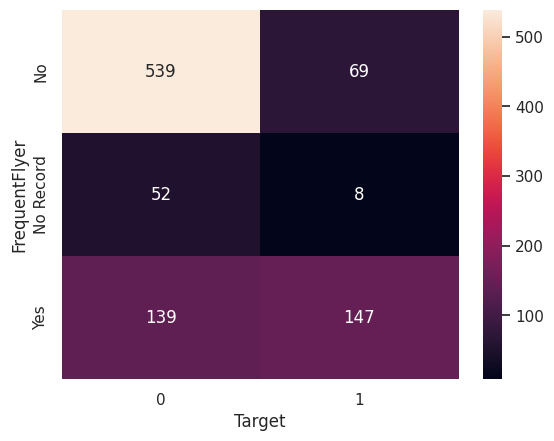

In [13]:
df_FrequentFlyer_by_target = df.groupby(by=['FrequentFlyer', 'Target']).agg(
                              no_customers=('Target','count')).reset_index().pivot('FrequentFlyer', 'Target', 'no_customers')

sns.heatmap(df_FrequentFlyer_by_target, annot=True, fmt='.0f')

**Explore AnnualIncomeClass by Target**

<ipython-input-14-797439789f23>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  no_customers=('Target','count')).reset_index().pivot('AnnualIncomeClass', 'Target', 'no_customers')


<Axes: xlabel='Target', ylabel='AnnualIncomeClass'>

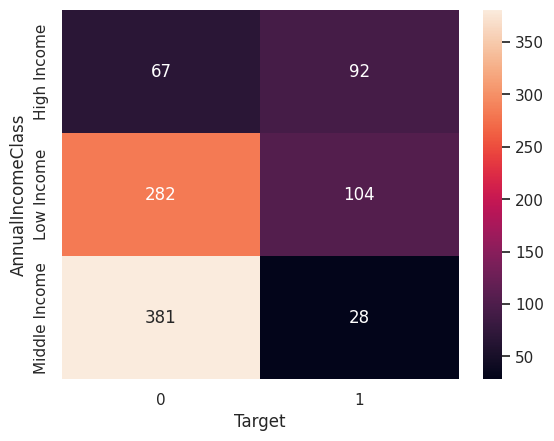

In [14]:
df_AnnualIncomeClass_by_target = df.groupby(by=['AnnualIncomeClass', 'Target']).agg(
                              no_customers=('Target','count')).reset_index().pivot('AnnualIncomeClass', 'Target', 'no_customers')

sns.heatmap(df_AnnualIncomeClass_by_target, annot=True, fmt='.0f')

**Explore AccountSyncedToSocialMedia by Target**


<ipython-input-15-b9a34e433c1f>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  no_customers=('Target','count')).reset_index().pivot('AccountSyncedToSocialMedia', 'Target', 'no_customers')


<Axes: xlabel='Target', ylabel='AccountSyncedToSocialMedia'>

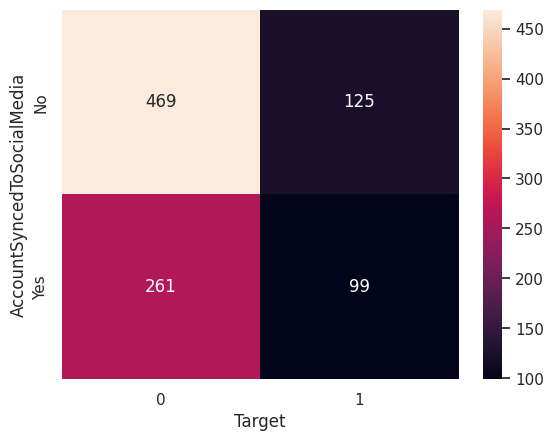

In [15]:
df_AccountSyncedToSocialMedia_by_target = df.groupby(by=['AccountSyncedToSocialMedia', 'Target']).agg(
                              no_customers=('Target','count')).reset_index().pivot('AccountSyncedToSocialMedia', 'Target', 'no_customers')

sns.heatmap(df_AccountSyncedToSocialMedia_by_target, annot=True, fmt='.0f')

**Explore BookedHotelOrNot by Target**


<ipython-input-16-990bbe00a752>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  no_customers=('Target','count')).reset_index().pivot('BookedHotelOrNot', 'Target', 'no_customers')


<Axes: xlabel='Target', ylabel='BookedHotelOrNot'>

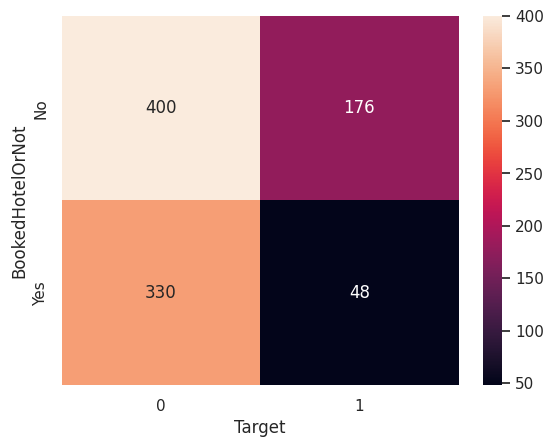

In [16]:
df_BookedHotelOrNot_by_target = df.groupby(by=['BookedHotelOrNot', 'Target']).agg(
                              no_customers=('Target','count')).reset_index().pivot('BookedHotelOrNot', 'Target', 'no_customers')

sns.heatmap(df_BookedHotelOrNot_by_target, annot=True, fmt='.0f')

### Data Processing

In [17]:
cat_data = pd.DataFrame()

cat_data = pd.concat([cat_data, pd.get_dummies(df['FrequentFlyer'], prefix='FrequentFlyer')], axis=1)
cat_data = pd.concat([cat_data, pd.get_dummies(df['AnnualIncomeClass'], prefix='AnnualIncomeClass')], axis=1)

df['AnnualIncomeClass'] = df['AnnualIncomeClass'].map({'Low Income':0,
                             'Middle Income':1,
                             'High Income':2})

cat_data = pd.concat([cat_data, df['AnnualIncomeClass']], axis=1)
cat_data

,FrequentFlyer_No,FrequentFlyer_No Record,FrequentFlyer_Yes,AnnualIncomeClass_High Income,AnnualIncomeClass_Low Income,AnnualIncomeClass_Middle Income,AnnualIncomeClass
0,1,0,0,0,0,1,1
1,0,0,1,0,1,0,0
2,1,0,0,0,0,1,1
3,1,0,0,0,0,1,1
4,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...
949,0,0,1,0,1,0,0
950,1,0,0,0,0,1,1
951,1,0,0,0,0,1,1
952,1,0,0,0,1,0,0


In [18]:
X = pd.concat([df[['Age', 'ServicesOpted']], cat_data], axis=1)
y = df['Target']

### Model Creation and Evaluation

In [19]:
# models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model selection and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, roc_curve, auc

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [21]:
#Create Generic function to fit data and display results/predictions
def fit_evaluate(clf, X_train, X_test, y_train, y_test):
    # fit model to training data
    clf.fit(X_train, y_train)

    # make predictions for train data
    y_pred_train = clf.predict(X_train)

    # make predictions for test data
    y_pred_test = clf.predict(X_test)
    # print evaluation
    print(classification_report(y_test, y_pred_test))
    print('\nConfusion Matrix: \n')
    s = sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='g', cmap='YlGnBu');
    s.set(xlabel='Predicted class', ylabel='True class')
    plt.show()

    fpr_train, tpr_train, _ = roc_curve(y_pred_train,  y_train)
    auc_train = roc_auc_score(y_pred_train, y_train)
    plt.plot(fpr_train,tpr_train, color='Blue', label='train: auc='+f'{auc_train:.2f}')

    fpr_test, tpr_test, _ = roc_curve(y_pred_test,  y_test)
    auc_test = roc_auc_score(y_pred_test, y_test)
    plt.plot(fpr_test,tpr_test, color='Red', label='test: auc='+f'{auc_test:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.legend(loc=4)
    plt.show()

* Logistic regression * 

              precision    recall  f1-score   support

           0       0.84      0.93      0.89       291
           1       0.68      0.44      0.53        91

    accuracy                           0.82       382
   macro avg       0.76      0.69      0.71       382
weighted avg       0.80      0.82      0.80       382


Confusion Matrix: 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


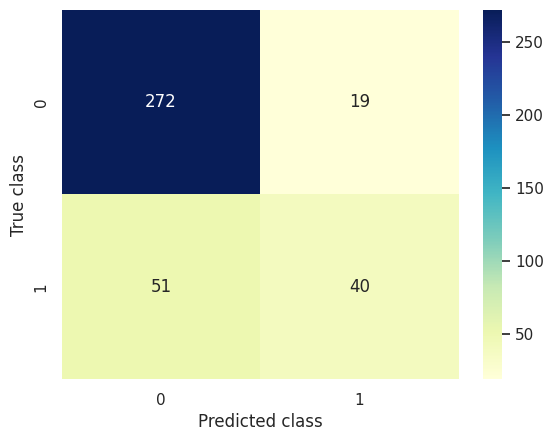

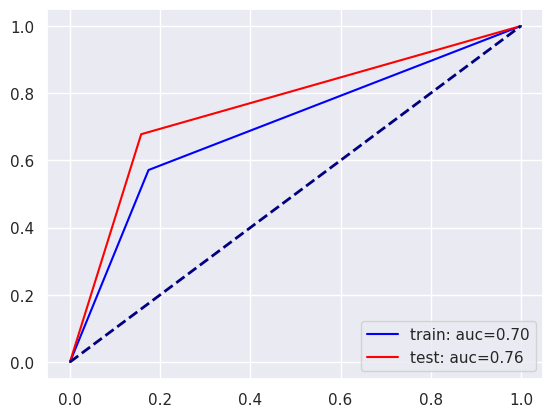

In [22]:
modelLR = LogisticRegression()
print('* Logistic regression * \n')
fit_evaluate(modelLR, X_train, X_test, y_train, y_test)

* Random Forest Classifier * 

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       291
           1       0.70      0.64      0.67        91

    accuracy                           0.85       382
   macro avg       0.79      0.78      0.78       382
weighted avg       0.84      0.85      0.85       382


Confusion Matrix: 



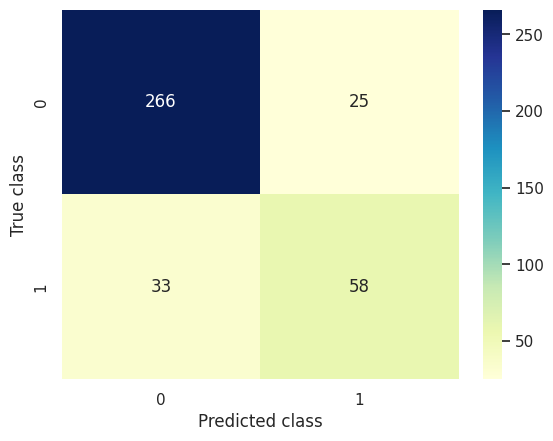

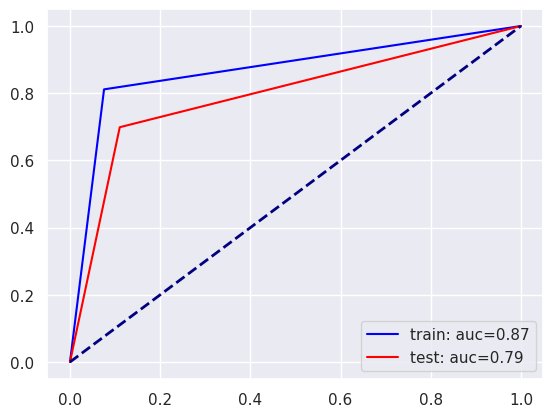

In [23]:
modelRF = RandomForestClassifier()
print('* Random Forest Classifier * \n')
fit_evaluate(modelRF, X_train, X_test, y_train, y_test)

* K Nearest Neighbors Classifier * 

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       291
           1       0.76      0.60      0.67        91

    accuracy                           0.86       382
   macro avg       0.82      0.77      0.79       382
weighted avg       0.86      0.86      0.86       382


Confusion Matrix: 



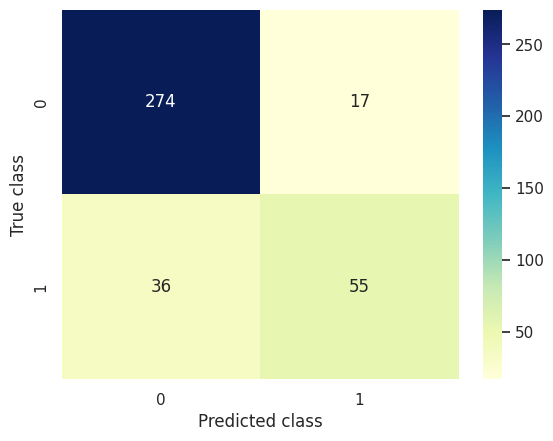

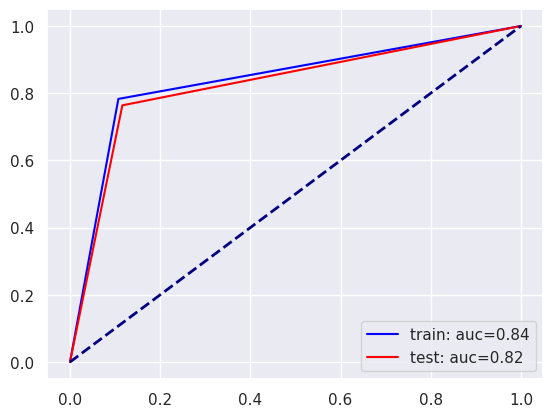

In [24]:
modelKNN = KNeighborsClassifier()
print('* K Nearest Neighbors Classifier * \n')
fit_evaluate(modelKNN, X_train, X_test, y_train, y_test)

#### SMOTE

In [25]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)

sm.fit(X_train, y_train)
X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)

* SMOTE and Logistic regression * 

              precision    recall  f1-score   support

           0       0.91      0.80      0.85       291
           1       0.54      0.74      0.62        91

    accuracy                           0.79       382
   macro avg       0.72      0.77      0.74       382
weighted avg       0.82      0.79      0.80       382


Confusion Matrix: 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


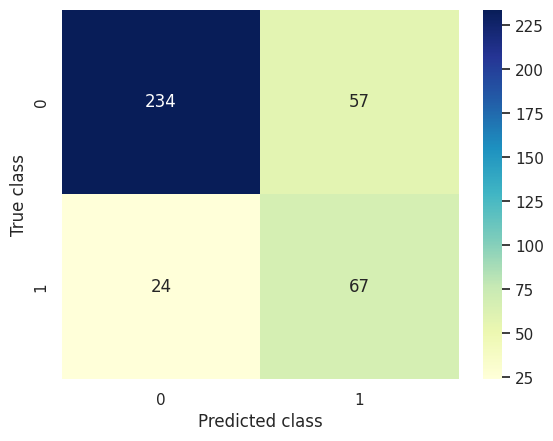

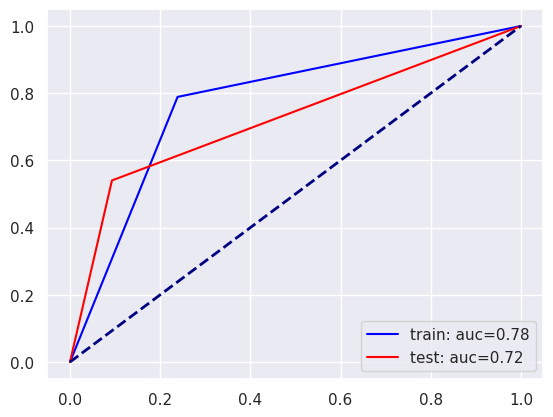

In [26]:
modelLR = LogisticRegression()
print('* SMOTE and Logistic regression * \n')
fit_evaluate(modelLR, X_train_SMOTE, X_test, y_train_SMOTE, y_test)

* SMOTE and Random Forest Classifier * 

              precision    recall  f1-score   support

           0       0.92      0.84      0.88       291
           1       0.59      0.77      0.67        91

    accuracy                           0.82       382
   macro avg       0.76      0.80      0.77       382
weighted avg       0.84      0.82      0.83       382


Confusion Matrix: 



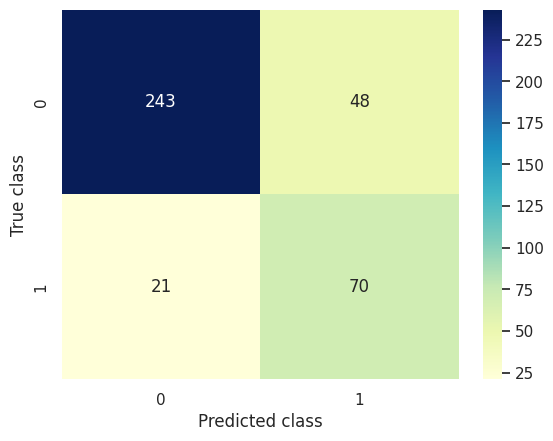

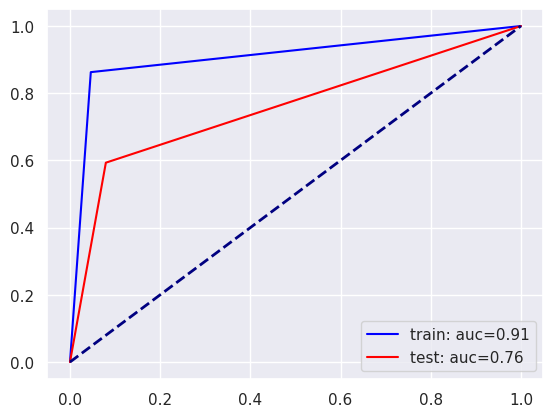

In [27]:
modelRF = RandomForestClassifier()
print('* SMOTE and Random Forest Classifier * \n')
fit_evaluate(modelRF, X_train_SMOTE, X_test, y_train_SMOTE, y_test)

* SMOTE and K Nearest Neighbors Classifier * 

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       291
           1       0.62      0.69      0.66        91

    accuracy                           0.83       382
   macro avg       0.76      0.78      0.77       382
weighted avg       0.83      0.83      0.83       382


Confusion Matrix: 



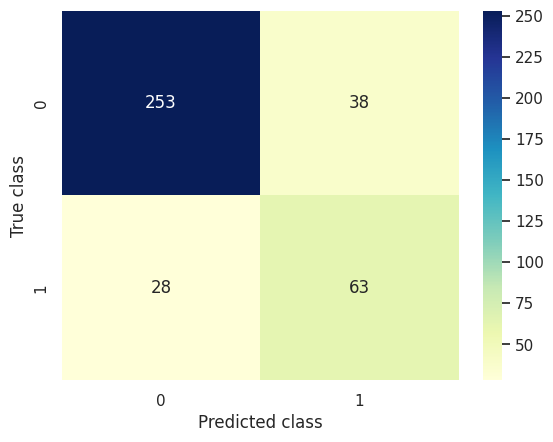

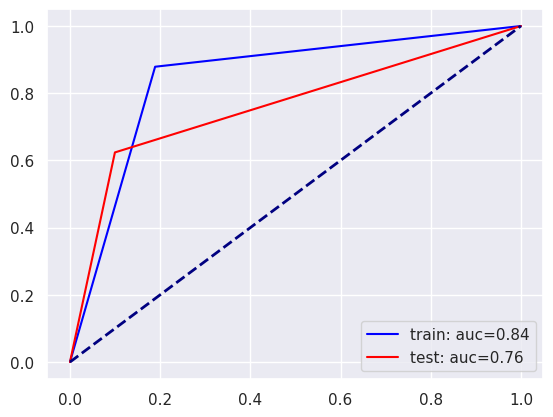

In [28]:
modelKNN = KNeighborsClassifier()
print('* SMOTE and K Nearest Neighbors Classifier * \n')
fit_evaluate(modelKNN, X_train_SMOTE, X_test, y_train_SMOTE, y_test)

#### Oversampling

In [29]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
ros.fit(X_train, y_train)
X_oversampled, y_oversampled = ros.fit_resample(X_train, y_train)

* Oversampling and Logistic regression * 

              precision    recall  f1-score   support

           0       0.92      0.76      0.83       291
           1       0.51      0.79      0.62        91

    accuracy                           0.77       382
   macro avg       0.72      0.78      0.73       382
weighted avg       0.82      0.77      0.78       382


Confusion Matrix: 



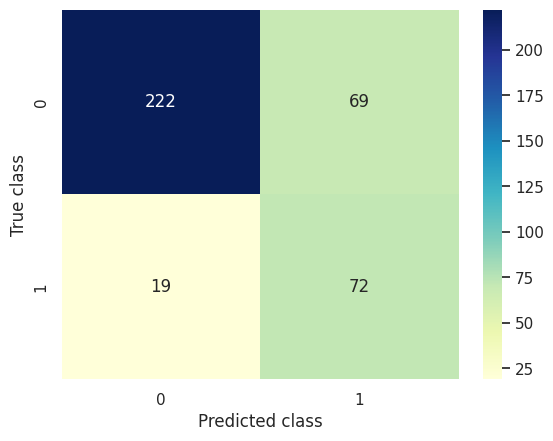

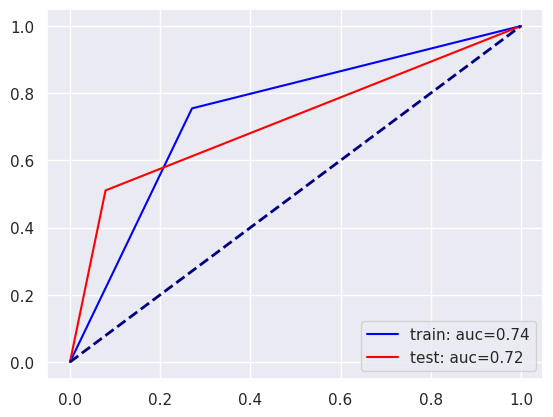

In [30]:
modelLR = LogisticRegression()
print('* Oversampling and Logistic regression * \n')
fit_evaluate(modelLR, X_oversampled, X_test, y_oversampled, y_test)

#### Undersampling

In [31]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
rus.fit(X_train, y_train)
X_undersampled, y_undersampled = rus.fit_resample(X_train, y_train)

* Undersampling and Logistic regression * 

              precision    recall  f1-score   support

           0       0.92      0.74      0.82       291
           1       0.49      0.79      0.60        91

    accuracy                           0.75       382
   macro avg       0.70      0.77      0.71       382
weighted avg       0.82      0.75      0.77       382


Confusion Matrix: 



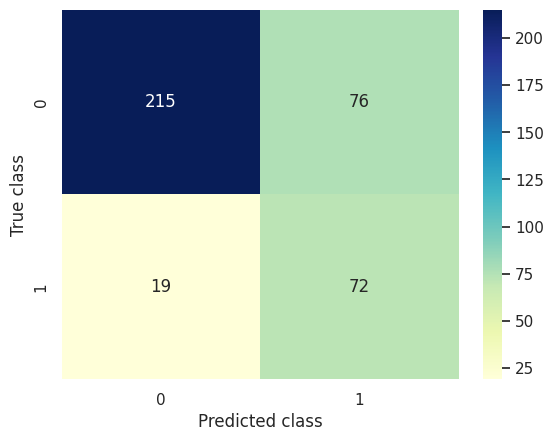

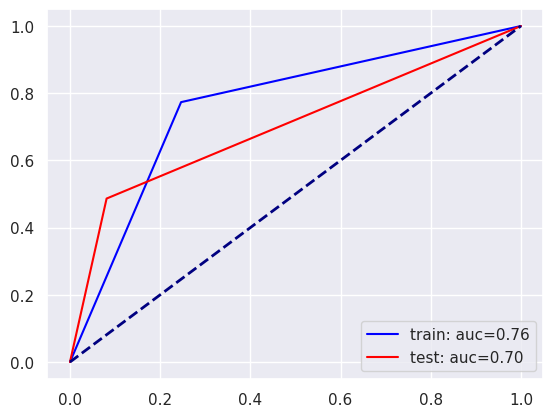

In [32]:
modelLR = LogisticRegression()
print('* Undersampling and Logistic regression * \n')
fit_evaluate(modelLR, X_undersampled, X_test, y_undersampled, y_test)

#### XGBoost

* XGBoost Classifier * 

              precision    recall  f1-score   support

           0       0.89      0.94      0.92       291
           1       0.77      0.64      0.70        91

    accuracy                           0.87       382
   macro avg       0.83      0.79      0.81       382
weighted avg       0.86      0.87      0.86       382


Confusion Matrix: 



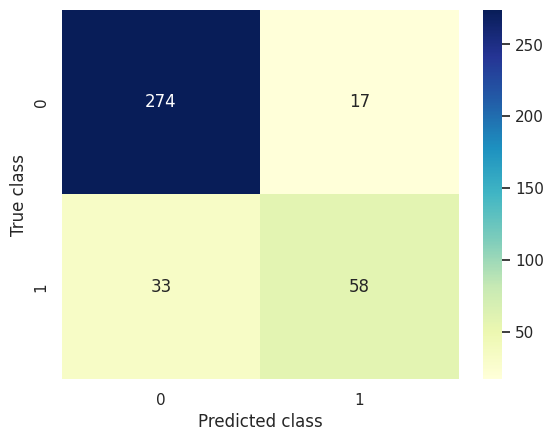

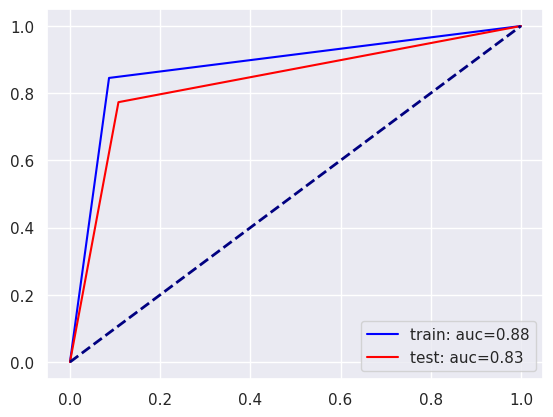

In [33]:
import xgboost as xgb

modelXGB = xgb.XGBClassifier(objective='binary:logistic', eval_metric="auc")
print('* XGBoost Classifier * \n')
fit_evaluate(modelXGB, X_train, X_test, y_train, y_test)

* XGBoost Classifier * 

              precision    recall  f1-score   support

           0       0.93      0.85      0.89       291
           1       0.62      0.78      0.69        91

    accuracy                           0.83       382
   macro avg       0.77      0.81      0.79       382
weighted avg       0.85      0.83      0.84       382


Confusion Matrix: 



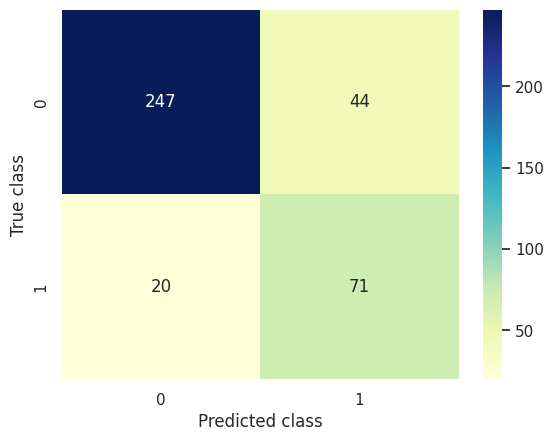

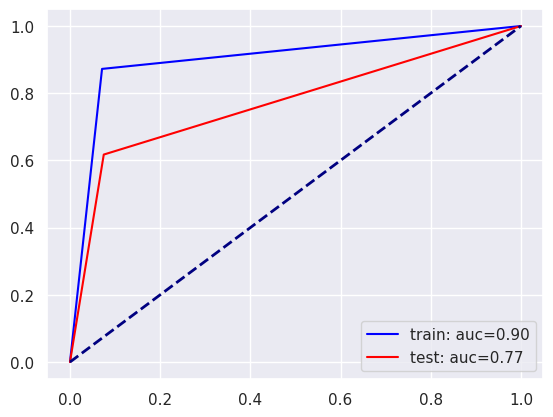

In [34]:
import xgboost as xgb

modelXGB = xgb.XGBClassifier(objective='binary:logistic', eval_metric="auc")
print('* XGBoost Classifier * \n')
fit_evaluate(modelXGB, X_train_SMOTE, X_test, y_train_SMOTE, y_test)

* XGBoost Classifier * 

              precision    recall  f1-score   support

           0       0.94      0.83      0.88       291
           1       0.60      0.82      0.69        91

    accuracy                           0.83       382
   macro avg       0.77      0.83      0.79       382
weighted avg       0.86      0.83      0.84       382


Confusion Matrix: 



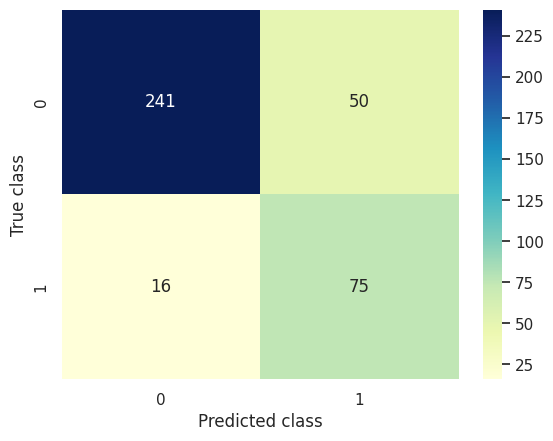

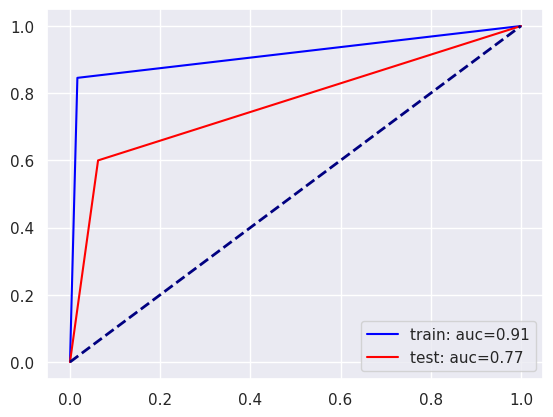

In [35]:
import xgboost as xgb

modelXGB = xgb.XGBClassifier(objective='binary:logistic', eval_metric="auc")
print('* XGBoost Classifier * \n')
fit_evaluate(modelXGB, X_oversampled, X_test, y_oversampled, y_test)

* XGBoost Classifier * 

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       291
           1       0.53      0.82      0.64        91

    accuracy                           0.78       382
   macro avg       0.73      0.80      0.74       382
weighted avg       0.84      0.78      0.80       382


Confusion Matrix: 



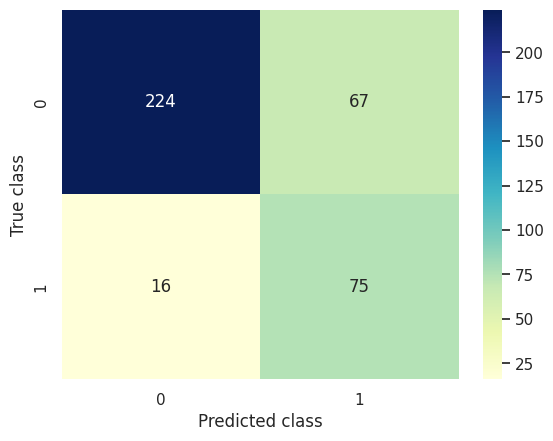

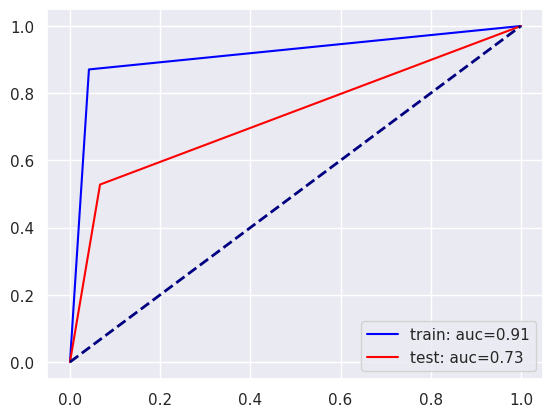

In [36]:
import xgboost as xgb

modelXGB = xgb.XGBClassifier(objective='binary:logistic', eval_metric="auc")
print('* XGBoost Classifier * \n')
fit_evaluate(modelXGB, X_undersampled, X_test, y_undersampled, y_test)

In [41]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import make_scorer, f1_score
import xgboost as xgb

# Define our search space for grid search
search_space = [
  {
    'clf__n_estimators': [100, 200, 300, 400],
    'clf__learning_rate': [0.01, 0.1],
    'clf__max_depth': [3, 4, 5],
    'clf__colsample_bytree': [i/10.0 for i in range(2, 5)],
    'clf__gamma': [i/10.0 for i in range(3)],
    'fs__score_func': [f_classif],
    'fs__k': ['all'],
  }
]

# Define cross validation
kfold = KFold(n_splits=5)

# F1 score as score
scoring = {'F1 score': 'f1_micro'}

# Define grid search
grid = GridSearchCV(
  pipe,
  param_grid=search_space,
  cv=kfold,
  scoring=scoring,
  refit='F1 score',
  verbose=1,
  n_jobs=-1
)

# Fit grid search
xgb_model_clv_GS = grid.fit(X_train, y_train)

# Get best parameters and best F1 score
best_params = xgb_model_clv_GS.best_params_
best_score = xgb_model_clv_GS.best_score_

# Print best parameters and best F1 score
print("Best Parameters:", best_params)
print("Best F1 Score:", best_score)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'clf__colsample_bytree': 0.4, 'clf__gamma': 0.2, 'clf__learning_rate': 0.1, 'clf__max_depth': 5, 'clf__n_estimators': 300, 'fs__k': 'all', 'fs__score_func': <function f_classif at 0x7f88f1881d80>}
Best F1 Score: 0.7918993135011443


#### XGBoost - Hyperparameter Tuning

In [37]:
## building pipeline for hyperparameter tuning

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2

# Create a pipeline
pipe = Pipeline([
  ('fs', SelectKBest()),
  ('clf', xgb.XGBClassifier(objective='binary:logistic', scale_pos_weight=9))
])

In [38]:
## hyper parameter tuning - grid search

from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer
# Define our search space for grid search
search_space = [
  {
    'clf__n_estimators': [50, 100, 150, 200],
    'clf__learning_rate': [0.01, 0.1],
    'clf__max_depth': range(2, 4),
    'clf__colsample_bytree': [i/10.0 for i in range(2, 5)],
    'clf__gamma': [i/10.0 for i in range(3)],
    'fs__score_func': [chi2],
    'fs__k': [2],
  }
]
# Define cross validation
kfold = KFold(n_splits=5)
# AUC and accuracy as score
scoring = {'AUC':'roc_auc', 'Accuracy':make_scorer(accuracy_score), 'F1 score': 'f1_micro'}
# Define grid search
grid = GridSearchCV(
  pipe,
  param_grid=search_space,
  cv=kfold,
  scoring=scoring,
  refit='AUC',
  verbose=1,
  n_jobs=-1
)

# Fit grid search
xgb_model_clv_GS = grid.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


In [39]:
print(xgb_model_clv_GS.best_params_)

{'clf__colsample_bytree': 0.2, 'clf__gamma': 0.0, 'clf__learning_rate': 0.01, 'clf__max_depth': 2, 'clf__n_estimators': 50, 'fs__k': 2, 'fs__score_func': <function chi2 at 0x7f88f1881bd0>}


* XGBoost Classifier * 

              precision    recall  f1-score   support

           0       0.81      0.98      0.89       291
           1       0.79      0.25      0.38        91

    accuracy                           0.81       382
   macro avg       0.80      0.62      0.63       382
weighted avg       0.80      0.81      0.77       382


Confusion Matrix: 



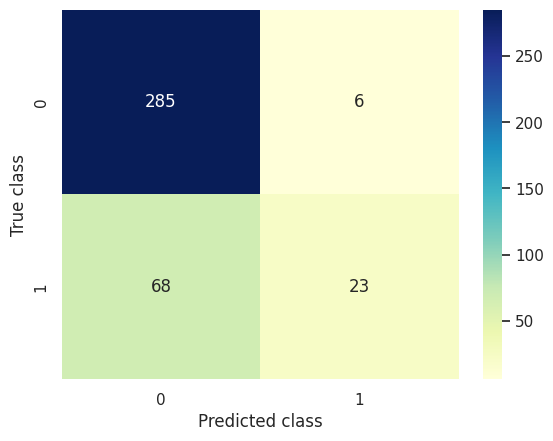

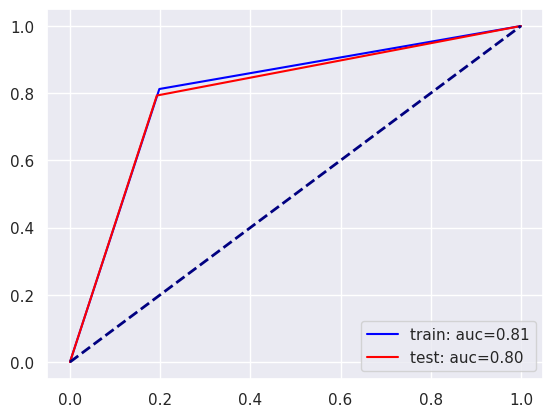

In [40]:
modelXGB = xgb.XGBClassifier(
 learning_rate =0.01,
 n_estimators=100,
 max_depth=2,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.4,
 objective= 'binary:logistic',
 eval_metric="auc")
print('* XGBoost Classifier * \n')
fit_evaluate(modelXGB, X_train, X_test, y_train, y_test)